# Elaboração de gráficos em Python

Para a elaboração de gráficos, utilizaremos as funções do pacote **matplotlib, seaborn e plotly**.

De modo geral, a elaboração de um gráfico com esses pacotes não costuma ser uma tarefa difícil, desde que o aluno tenha em mente algumas coisas:

* Uma ideia clara de qual gráfico se quer elaborar;

* O entendimento de que as funções desses pacotes construirão um gráfico a partir de, necessariamente, um DataFrame (ou Series)

Obviamente, a depender das razões do discente, pode haver gráficos que dependerão de um nível alto de erudição no Python. Porém, para a maior das necessidades desse curso, o aluno encontrará soluções interessantes nos códigos abaixo.

Dito isso, vamos importar os pacotes necessários:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

## Gráfico de barras

Vamos carregar a base de dados que será utilizada para a construção de um gráfico de barras.

In [2]:
# Para conseguir abrir os arquivos .RData da aula
!pip install pyreadr

In [3]:
import pyreadr

result = pyreadr.read_r('perfil_investidor.RData')

print(result.keys())
perfil_investidor = result["perfil_investidor"]
perfil_investidor.head(3)

odict_keys(['perfil_investidor'])


,estudante,perfil
0,Gabriela,Conservador
1,Luiz Felipe,Conservador
2,PatrÃ­cia,Conservador


Aplicando a sintaxe básica do matplotlib e do seaborn à base de dados:

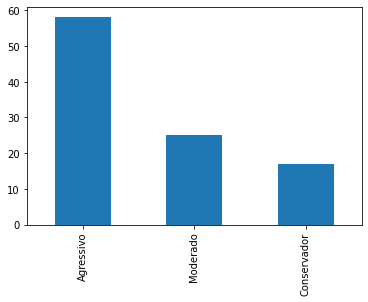

In [4]:
# Necessário agrupar os valores de perfil usando value_counts()
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts().plot(kind='bar', ax=axes)
plt.show()

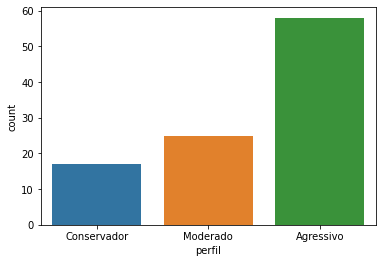

In [5]:
# Ou...
sns.countplot(data=perfil_investidor, x='perfil')

O primeiro gráfico, sem Seaborn, não apresenta os labels na ordem que desejamos. Para colocá-los em ordem, basta adicionar a ordem após o value_counts():

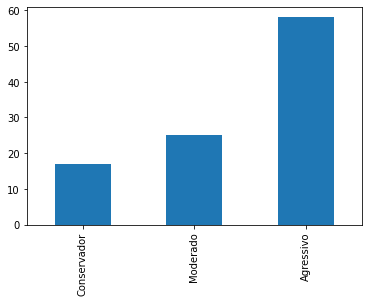

In [6]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(kind='bar', ax=axes)
plt.show()

Adicionando informações ao nosso gráfico:

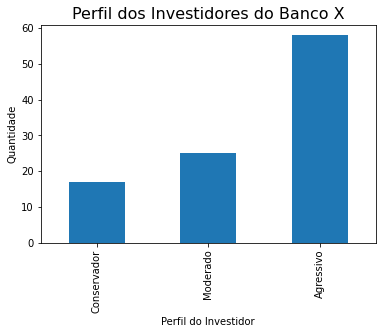

In [7]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(kind='bar', ax=axes)
axes.set_title("Perfil dos Investidores do Banco X", size=16)
axes.set_xlabel("Perfil do Investidor")
axes.set_ylabel("Quantidade")
plt.show()

Adicionando detalhamentos ao gráfico:

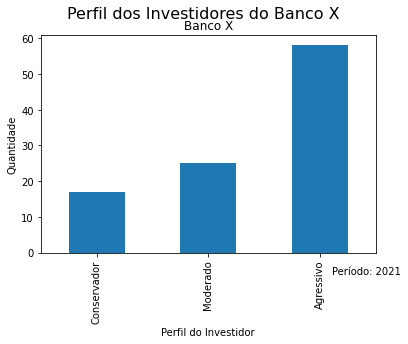

In [8]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(kind='bar', ax=axes)
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
axes.set_ylabel("Quantidade")
fig.text(.8, .05, "Período: 2021") # Alternativa para caption
plt.show()

Colocando os labels do eixo X na horizontal como no Seaborn:

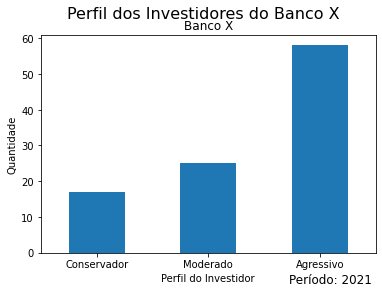

In [9]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(kind='bar', ax=axes)
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.show()

Adicionando cores à plotagem:

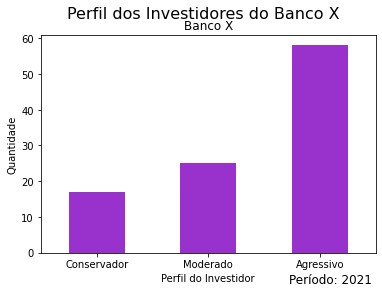

In [10]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(kind='bar', ax=axes, color='darkorchid')
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.show()

Para verificar as cores possíveis de serem utilizadas no Matplotlib, pode-se acessar o seguinte endereço: https://matplotlib.org/3.5.0/gallery/color/named_colors.html

Adicionando bordas:

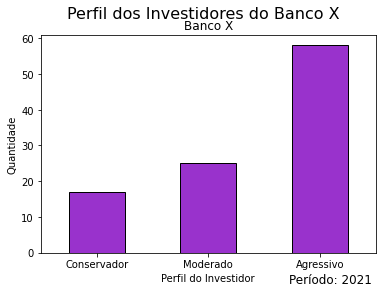

In [11]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(
    kind='bar', ax=axes, color='darkorchid', edgecolor='black')
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.setp(axes.patches, linewidth=1)
plt.show()

Para modificar o fundo dos gráficos, há algumas opções:

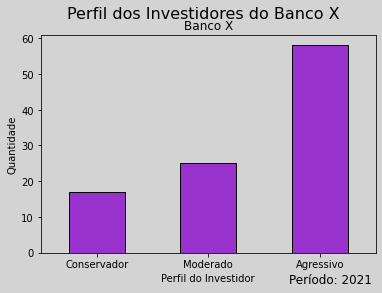

In [12]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(
    kind='bar', ax=axes, color='darkorchid', edgecolor='black')
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.setp(axes.patches, linewidth=1)
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
plt.show()

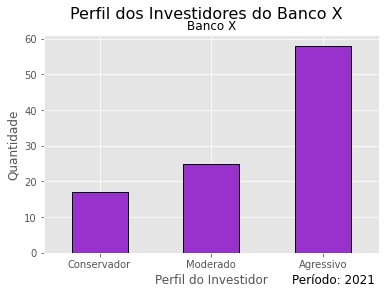

In [13]:
with plt.style.context('ggplot'):
  fig, axes = plt.subplots(1, 1)
  perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(
      kind='bar', ax=axes, color='darkorchid', edgecolor='black')
  plt.suptitle("Perfil dos Investidores do Banco X", size=16)
  plt.title("Banco X", size=12)
  axes.set_xlabel("Perfil do Investidor")
  plt.xticks(rotation=0)
  axes.set_ylabel("Quantidade")
  fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
  plt.setp(axes.patches, linewidth=1)
  plt.show()

Adicionando labels nos valores:

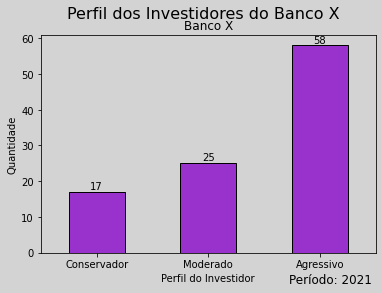

In [14]:
fig, axes = plt.subplots(1, 1)
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(
    kind='bar', ax=axes, color='darkorchid', edgecolor='black')
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.setp(axes.patches, linewidth=1)
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
for p in axes.patches:
    axes.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-1.2), ha='center', va='center',
                  xytext=(0, 10), textcoords='offset points')
plt.show()

Reposicionando labels:

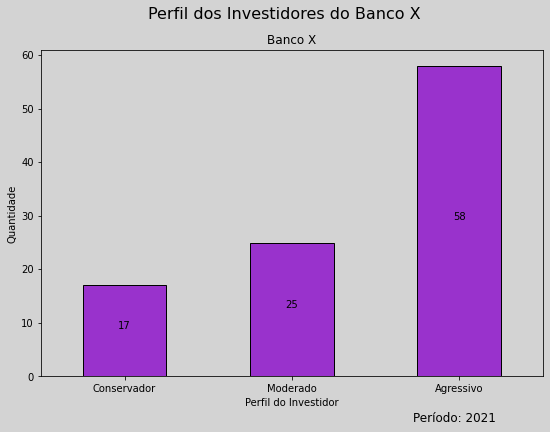

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(9,6))
perfil_investidor['perfil'].value_counts()[["Conservador", "Moderado", "Agressivo"]].plot(
    kind='bar', ax=axes, color='darkorchid', edgecolor='black')
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.setp(axes.patches, linewidth=1)
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
for p in axes.patches:
    axes.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()/2-1), ha='center', va='center',
                  xytext=(0, 10), textcoords='offset points')
plt.show()

Rotacionando o gráfico:

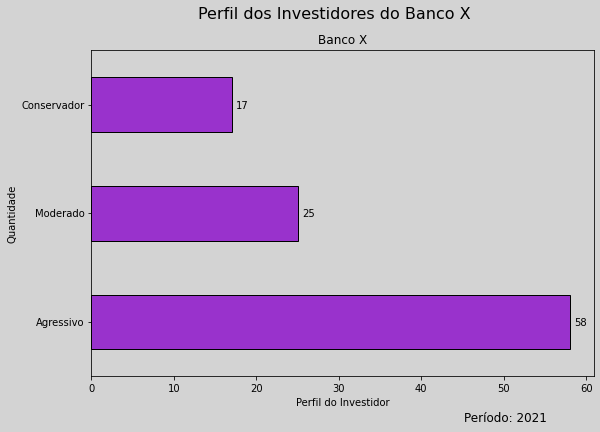

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(9,6))
perfil_investidor['perfil'].value_counts()[["Agressivo", "Moderado", "Conservador"]].plot(
    kind='barh', ax=axes, color='darkorchid', edgecolor='black')
plt.suptitle("Perfil dos Investidores do Banco X", size=16)
plt.title("Banco X", size=12)
axes.set_xlabel("Perfil do Investidor")
plt.xticks(rotation=0)
axes.set_ylabel("Quantidade")
fig.text(.7, .02, "Período: 2021", size=12) # Alternativa para caption
plt.setp(axes.patches, linewidth=1)
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
for p in axes.patches:
    axes.annotate(p.get_width(), (p.get_width()+1.3, p.get_y()+0.15), ha='center', va='center',
                  xytext=(0, 10), textcoords='offset points')
plt.show()

## Histograma

Vamos utilizar alguns dados sobre os municípios de São Paulo para essa nova demanda:

In [17]:
result = pyreadr.read_r('dados_sp.RData')

print(result.keys())
dados_sp = result["dados_sp"]
dados_sp.head(3)

odict_keys(['dados_sp'])


,codigo,populacao,densidade_pop,idh,pib
0,3500105.0,35023.0,82.15,0.790,32838.70
1,3500204.0,3571.0,16.85,0.730,23911.98
2,3500303.0,35954.0,67.72,0.715,21719.50


Aplicando sintaxes básicas do Matplotlib e Seaborn:

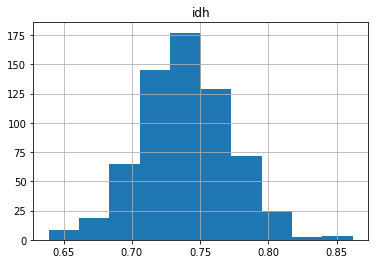

In [18]:
fig, axes = plt.subplots(1, 1)
dados_sp.hist(column='idh', ax=axes)
plt.show()

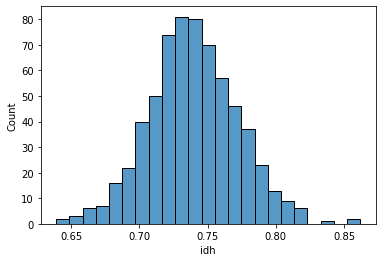

In [19]:
# Ou:
sns.histplot(data=dados_sp, x="idh")

Colorindo o gráfico:

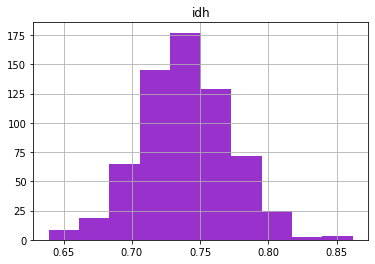

In [20]:
fig, axes = plt.subplots(1, 1)
dados_sp.hist(column='idh', ax=axes, color='darkorchid')
plt.show()

Alterando o plano de fundo:

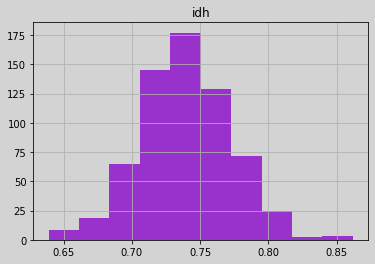

In [21]:
fig, axes = plt.subplots(1, 1)
dados_sp.hist(column='idh', ax=axes, color='darkorchid')
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
plt.show()

Adicionando contornos, título e nome dos eixos e removendo as linhas de grid:

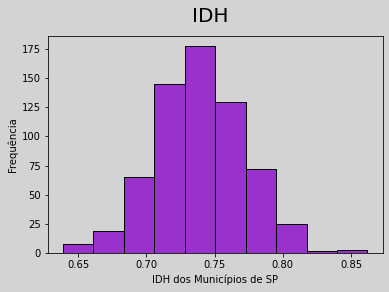

In [22]:
fig, axes = plt.subplots(1, 1)
dados_sp.hist(column='idh', ax=axes, color='darkorchid', edgecolor='black')
axes.get_figure().gca().set_title("") # Importante para remover o título automático!!
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
plt.suptitle("IDH", size=20)
axes.set_xlabel("IDH dos Municípios de SP")
axes.set_ylabel("Frequência")
axes.grid(False)
plt.setp(axes.patches, linewidth=1)
plt.show()

Alterando a quantidade de caixas do histograma:

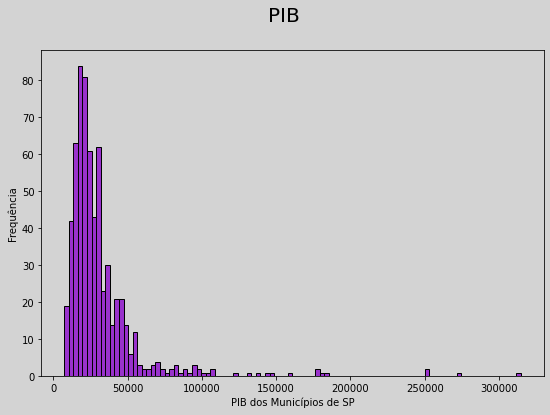

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(9,6))
dados_sp.hist(column='pib', ax=axes, color='darkorchid', edgecolor='black', bins=100)
axes.get_figure().gca().set_title("") # Importante para remover o título automático!!
fig.set_facecolor("lightgrey")
axes.set_facecolor("lightgrey")
plt.suptitle("PIB", size=20)
axes.set_xlabel("PIB dos Municípios de SP")
axes.set_ylabel("Frequência")
axes.grid(False)
plt.setp(axes.patches, linewidth=1)
plt.show()

## Gráfico de Pontos

Para esse desafio, utilizaremos dados sobre os bairros da capital de São Paulo:

In [24]:
atlas_ambiental = pd.read_csv("atlas_ambiental.csv", encoding='latin')
atlas_ambiental.head(3)

,Unnamed: 0,cód_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.98,0.00,125.610001
1,2,2,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.57,0.69,57.560001
2,3,3,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.68,0.00,8.570000


Aplicando a sintaxe básica de Matplotlib e Seaborn:

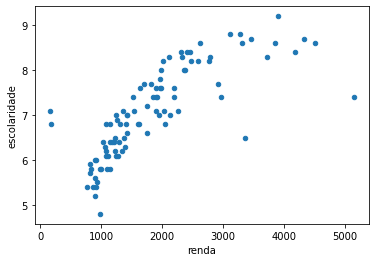

In [25]:
fig, axes = plt.subplots(1, 1)
atlas_ambiental.plot(kind='scatter', x='renda', y='escolaridade', ax=axes)
plt.show()

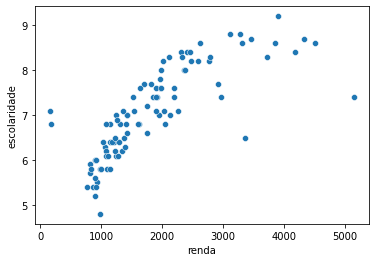

In [26]:
# Ou:
sns.scatterplot(data=atlas_ambiental, x="renda", y="escolaridade")

Estratificando informações com o argumento size:

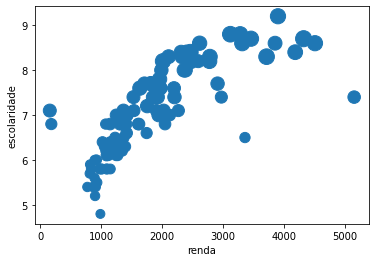

In [27]:
fig, axes = plt.subplots(1, 1)
atlas_ambiental.plot(kind='scatter', x='renda', y='escolaridade',
                     s=(atlas_ambiental.idade**2)/5, ax=axes)
plt.show()

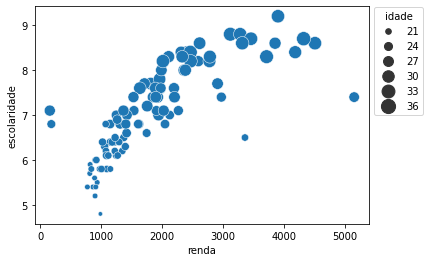

In [28]:
# Ou:
fig, axes = plt.subplots(1, 1)
p = sns.scatterplot(data=atlas_ambiental, x='renda', y='escolaridade', size='idade',
                    palette='GnBu', sizes=(20, 200), ax=axes)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Estratificando informações com o argumento color:

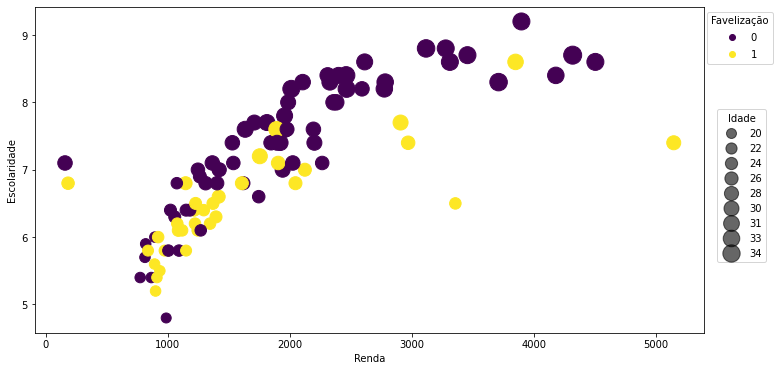

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
scatter = axes.scatter(x=atlas_ambiental.renda, y=atlas_ambiental.escolaridade,
                     s=(atlas_ambiental.idade**2)/4, c=atlas_ambiental.favel>6, cmap='viridis')

# produce a legend with the unique colors from the scatter
legend1 = axes.legend(*scatter.legend_elements(),
                    loc="upper right", title="Favelização", bbox_to_anchor=(1.11, 1))
axes.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
labels = [int(''.join(char for char in string if char.isdigit())) for string in labels]
labels = [int((label*4)**0.5) for label in labels]
legend2 = axes.legend(handles, labels, loc="upper right", title="Idade", bbox_to_anchor=(1.1, 0.7))

axes.set_xlabel("Renda")
axes.set_ylabel("Escolaridade")
plt.show()

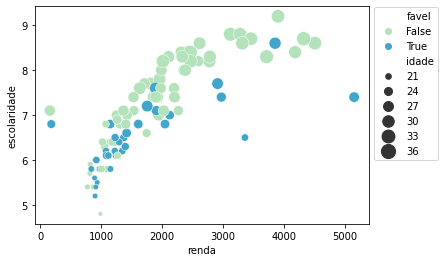

In [30]:
# Ou:
fig, axes = plt.subplots(1, 1)
p = sns.scatterplot(data=atlas_ambiental, x='renda', y='escolaridade', size='idade',
                    hue=atlas_ambiental.favel>6, palette='GnBu', sizes=(20, 200), ax=axes)
sns.move_legend(p, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Estratificando informações com o argumento marker:

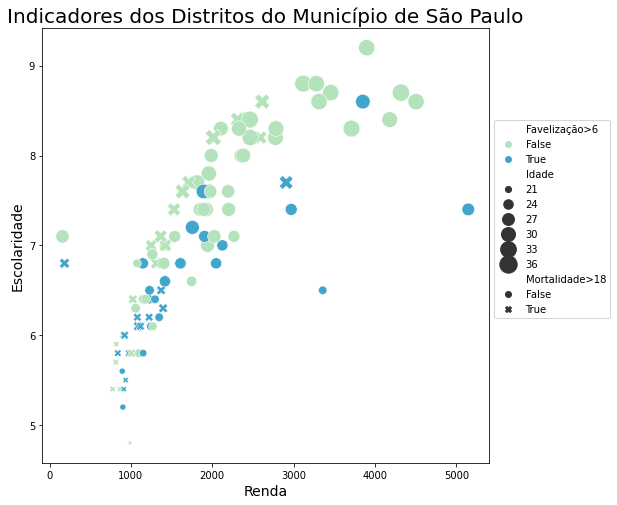

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(8,8))
p = sns.scatterplot(data=atlas_ambiental, x='renda', y='escolaridade', size='idade',
                    hue=atlas_ambiental.favel>6, style=atlas_ambiental.mortalidade>18,
                    palette='GnBu', sizes=(20, 300), ax=axes)
plt.title("Indicadores dos Distritos do Município de São Paulo", size=20)
axes.set_xlabel("Renda", size=14)
axes.set_ylabel("Escolaridade", size=14)

handles, labels  =  axes.get_legend_handles_labels()
axes.legend(handles, ['Favelização>6', 'False', 'True', 'Idade', '21', '24', '27', '30', '33', '36', 'Mortalidade>18', 'False', 'True'],
            loc='lower right')

sns.move_legend(p, bbox_to_anchor=(1, 0.8), loc='upper left')

plt.show()

Traçando uma linha de tendências:

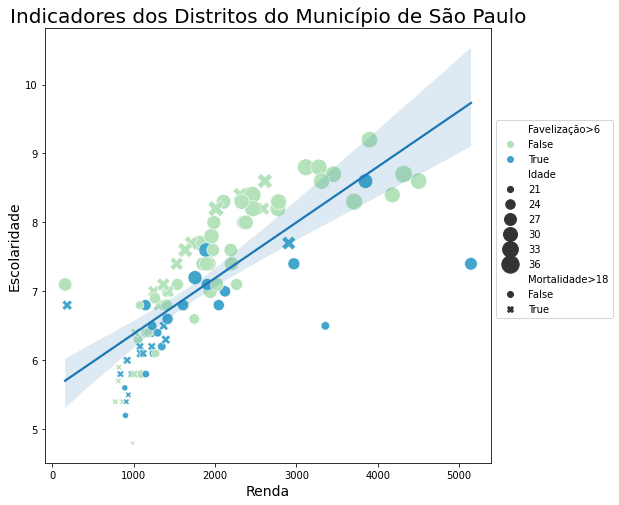

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(8,8))
p = sns.scatterplot(data=atlas_ambiental, x='renda', y='escolaridade', size='idade',
                    hue=atlas_ambiental.favel>6, style=atlas_ambiental.mortalidade>18,
                    palette='GnBu', sizes=(20, 300), ax=axes)
sns.regplot(data=atlas_ambiental, x="renda", y="escolaridade", scatter=False, ax=axes)

plt.title("Indicadores dos Distritos do Município de São Paulo", size=20)
axes.set_xlabel("Renda", size=14)
axes.set_ylabel("Escolaridade", size=14)

handles, labels  =  axes.get_legend_handles_labels()
axes.legend(handles, ['Favelização>6', 'False', 'True', 'Idade', '21', '24', '27', '30', '33', '36', 'Mortalidade>18', 'False', 'True'],
            loc='lower right')

sns.move_legend(p, bbox_to_anchor=(1, 0.8), loc='upper left')

plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


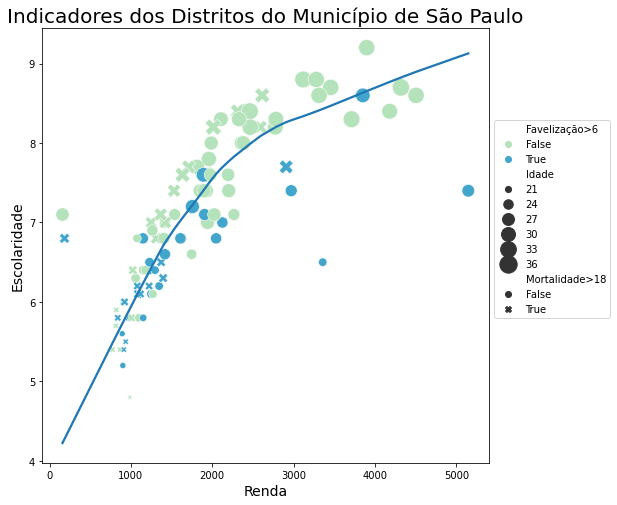

In [33]:
# Ou:
fig, axes = plt.subplots(1, 1, figsize=(8,8))
p = sns.scatterplot(data=atlas_ambiental, x='renda', y='escolaridade', size='idade',
                    hue=atlas_ambiental.favel>6, style=atlas_ambiental.mortalidade>18,
                    palette='GnBu', sizes=(20, 300), ax=axes)
sns.regplot(data=atlas_ambiental, x="renda", y="escolaridade", scatter=False, lowess=True, ax=axes)

plt.title("Indicadores dos Distritos do Município de São Paulo", size=20)
axes.set_xlabel("Renda", size=14)
axes.set_ylabel("Escolaridade", size=14)

handles, labels  =  axes.get_legend_handles_labels()
axes.legend(handles, ['Favelização>6', 'False', 'True', 'Idade', '21', '24', '27', '30', '33', '36', 'Mortalidade>18', 'False', 'True'],
            loc='lower right')

sns.move_legend(p, bbox_to_anchor=(1, 0.8), loc='upper left')

plt.show()

Aproveitando o assunto “tendências”, vamos seguir explorando as capacidades do Python com uma nova base de dados sobre a corrupção no mundo (Fisman & Miguel, 2007):

In [34]:
result = pyreadr.read_r('fisman_miguel.RData')

print(result.keys())
fisman_miguel = result["fisman_miguel"]
fisman_miguel.head(3)

odict_keys(['fisman_miguel'])


,country,code,violations,staff,post,corruption,region
0,Angola,AGO,744.0,9.0,no,1.047506,Africa
1,Angola,AGO,15.0,9.0,yes,1.047506,Africa
2,Albania,ALB,257.0,3.0,no,0.921079,Europe


Notem que seria interessante plotar, por exemplo, o número de violações de trânsito em função do índice de corrupção do país. Vamos tentar?

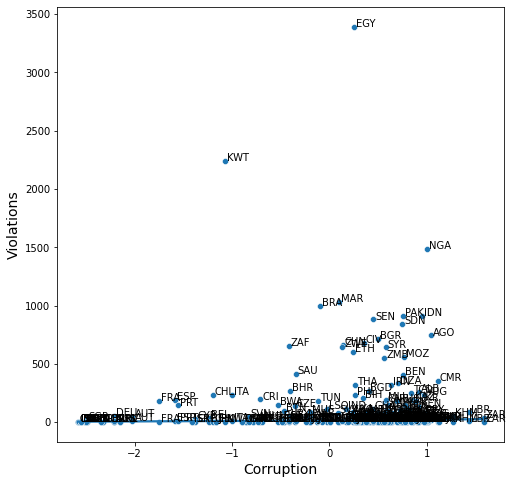

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(8,8))
p = sns.scatterplot(data=fisman_miguel, x='corruption', y='violations', ax=axes)
sns.regplot(data=fisman_miguel, x="corruption", y="violations", scatter=False, lowess=True, ax=axes)

axes.set_xlabel("Corruption", size=14)
axes.set_ylabel("Violations", size=14)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fisman_miguel.corruption, fisman_miguel.violations, fisman_miguel.code, plt.gca()) 

plt.show()

Note que há dois problemas principais:

1) Há muitos países sem violações reportadas, ou com um baixo número de violações, e países com um número alto de violações reportadas, o que deixaria o gráfico com problemas de escala;

2) Haveria uma dupla contagem, porque os países foram verificados antes e depois da imposição da nova lei de NY.

Vamos tentar mitigar o primeiro problema, padronizando os valores da variável violations:

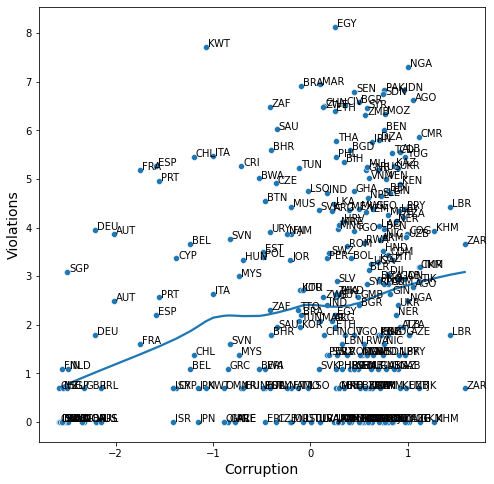

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(8,8))

fisman_miguel['log_violations'] = np.log(fisman_miguel['violations'] + 1)
p = sns.scatterplot(data=fisman_miguel, x='corruption', y='log_violations', ax=axes)
sns.regplot(data=fisman_miguel, x="corruption", y='log_violations', scatter=False, lowess=True, ax=axes)

axes.set_xlabel("Corruption", size=14)
axes.set_ylabel("Violations", size=14)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(fisman_miguel.corruption, fisman_miguel.log_violations, fisman_miguel.code, plt.gca()) 

plt.show()

Agora, podemos tentar mitigar o segundo problema utilizando o gráfico **relplot** do seaborn:

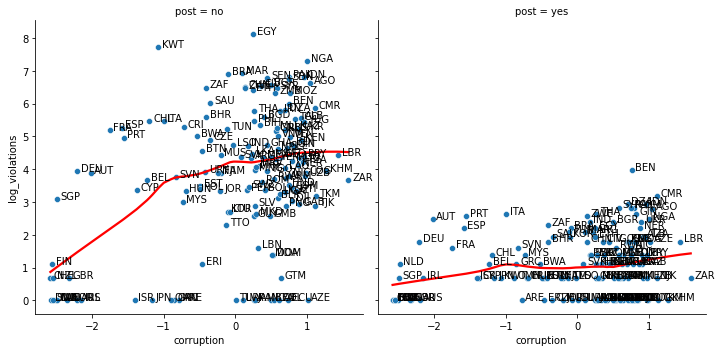

In [37]:
# fig, axes = plt.subplots(1, 1, figsize=(8,8))

fisman_miguel['log_violations'] = np.log(fisman_miguel['violations'] + 1)
p = sns.relplot(data=fisman_miguel, x='corruption', y='log_violations', col='post')

p.data = fisman_miguel
p.map(sns.regplot, 'corruption', 'log_violations', color='r', ci=None, scatter=False, lowess=True)

for i in [0, 1]:
  for idx, row in fisman_miguel.iterrows():
      x = row.corruption
      y = row.log_violations
      text = row.code
      if (row.post=='no' and i==0) or (row.post=='yes' and i==1):
          p.axes[0, i].text(x+.05, y, text, horizontalalignment='left')

plt.show()

Note um terceiro problema não identificado anteriormente: a sobreposição de labels. Podemos tentar resolver a situação em R com a função geom_text_repel(), do pacote ggrepel. Porém, no Python, não há uma solução bem estabelecida para resolver o problema. Pode-se tentar utilizar o pacote [adjustText](https://github.com/Phlya/adjustText), mas não vou aplicá-lo aqui.


## Gráfico de Linhas

Para os nossos gráficos de linhas, vamos utilizar dados da atual pandemia no Brasil, Índia, Rússia e Estados Unidos da América:

In [38]:
result = pyreadr.read_r('covid_110521.RData')

print(result.keys())
covid_110521 = result["covid_110521"]
covid_110521.head(3)

odict_keys(['covid_110521'])


,country,geoid,pop,schedule,t,daily_cases,daily_deaths,cumulative_cases,cumulative_deaths
0,Brazil,BR,211049519,2020-02-26,1,1,0,1,0
1,Brazil,BR,211049519,2020-02-27,2,0,0,1,0
2,Brazil,BR,211049519,2020-02-28,3,0,0,1,0


Aplicando a sintaxe básica do Matplotlib/Seaborn:

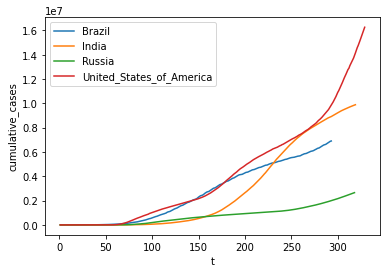

In [39]:
fig, axes = plt.subplots(1, 1)
for idx, gp in covid_110521.groupby('country'):
    gp.plot(x='t', y='cumulative_cases', ax=axes, label=idx)
axes.set_ylabel("cumulative_cases")
plt.show()

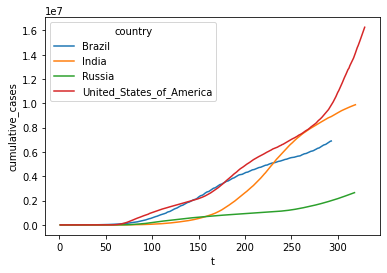

In [40]:
# Ou:
sns.lineplot(data=covid_110521, x="t", y="cumulative_cases", hue="country")

Adicionando informações e deixando o gráfico mais elegante:

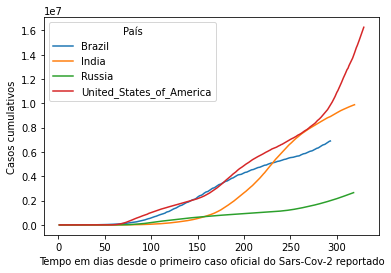

In [41]:
fig, axes = plt.subplots(1, 1)
sns.lineplot(data=covid_110521, x="t", y="cumulative_cases", hue="country", ax=axes)
axes.set_xlabel("Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado")
axes.set_ylabel("Casos cumulativos")
plt.legend(title='País')
plt.show()

O gráfico anterior poderia ser mais informativo, visto que, por exemplo, compara países com tamanhos populacionais distintos. Portanto, a magnitude das infecções também é distinta. Uma possibilidade de suavização da situação poderia ser a padronização da variável ‘cumulative_cases’. No gráfico a seguir, padronizamos os casos cumulativos de cada país numa escala log10:

In [42]:
covid_110521["log_ccases"] = np.log10(covid_110521["cumulative_cases"])

O gráfico resultante é o seguinte:

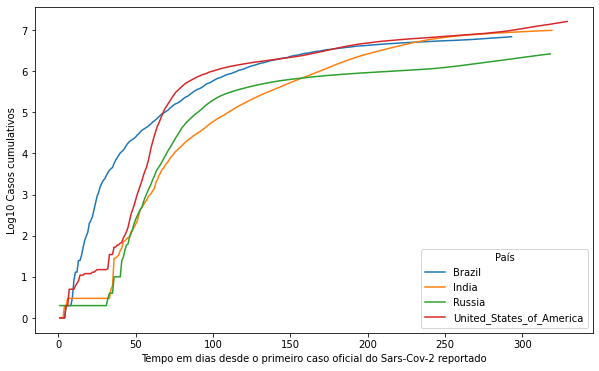

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=covid_110521, x="t", y="log_ccases", hue="country", ax=axes)
axes.set_xlabel("Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado")
axes.set_ylabel("Log10 Casos cumulativos")
plt.legend(title='País')
plt.show()

Por mais que dê para se extrair alguns insights interessantes do gráfico anterior, alguém poderia dizer que seria melhor, por exemplo, utilizar uma proporção da população infectada em razão do tempo passado:

In [44]:
covid_110521["pop_ccases"] = covid_110521['cumulative_cases'] / covid_110521['pop']

A seguir, o resultado visual:

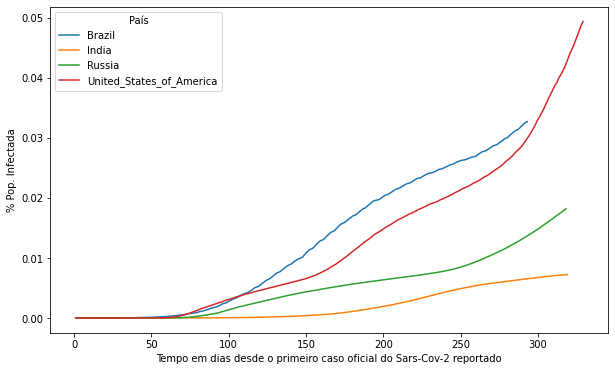

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=covid_110521, x="t", y="pop_ccases", hue="country", ax=axes)
axes.set_xlabel("Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado")
axes.set_ylabel("% Pop. Infectada")
plt.legend(title='País')
plt.show()

Ainda assim, os gráficos não trazem uma informação importante: os valores dos casos cumulativos por dia e por país. Em regra, podemos utilizar o padrão axes.text() para isso:

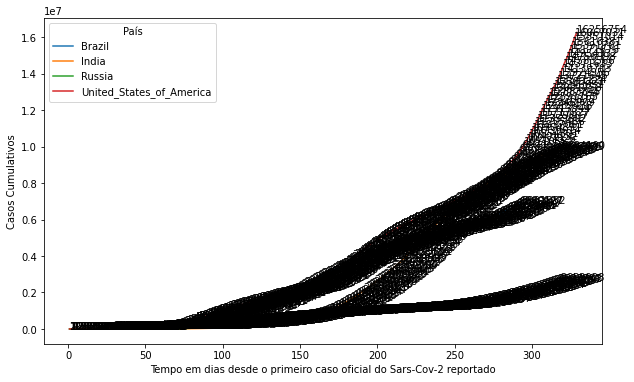

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
p = sns.lineplot(data=covid_110521, x="t", y="cumulative_cases", hue="country", ax=axes)

for idx, row in covid_110521.iterrows():
      x = row.t
      y = row.cumulative_cases
      text = row.cumulative_cases
      axes.text(x+.05, y, text, horizontalalignment='left')

axes.set_xlabel("Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado")
axes.set_ylabel("Casos Cumulativos")
plt.legend(title='País')
plt.show()

Está caótico, certo? E se alterássemos o ângulo de exibição das labels?

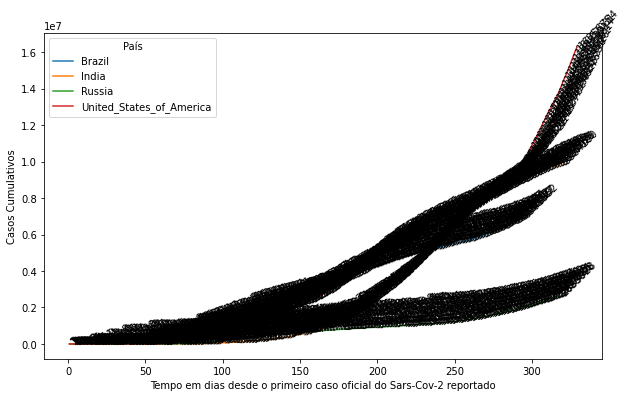

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
p = sns.lineplot(data=covid_110521, x="t", y="cumulative_cases", hue="country", ax=axes)

for idx, row in covid_110521.iterrows():
      x = row.t
      y = row.cumulative_cases
      text = row.cumulative_cases
      axes.text(x+.05, y, text, horizontalalignment='left', rotation=45)

axes.set_xlabel("Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado")
axes.set_ylabel("Casos Cumulativos")
plt.legend(title='País')
plt.show()

Podemos tentar utilizar outro espaçamento para esses labels:

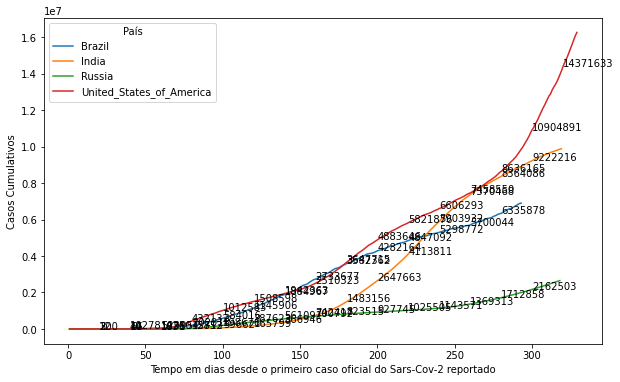

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
p = sns.lineplot(data=covid_110521, x="t", y="cumulative_cases", hue="country", ax=axes)

for idx, row in covid_110521.iterrows():
      x = row.t
      y = row.cumulative_cases
      text = row.cumulative_cases
      if x%20==0:
          axes.text(x+.05, y, text, horizontalalignment='left')

axes.set_xlabel("Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado")
axes.set_ylabel("Casos Cumulativos")
plt.legend(title='País')
plt.show()

Em casos extremos, como no exemplo apresentado, talvez seja melhor omitir as labels e deixar o gráfico interativo com o usuário da informação. Podemos fazer isso com o pacote ‘plotly’:

In [49]:
fig = px.line(covid_110521, x="t", y="cumulative_cases", color="country", labels={"country": "País"})
fig.update_layout(xaxis_title='Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado',
                  yaxis_title='Casos Cumulativos')
fig.show()

Agora basta passar o mouse pelo gráfico para ter acesso às informações necessárias!

Caso quiséssemos fazer uma análise diária, bastaria mudar a variável de interesse:

In [50]:
fig = px.line(covid_110521, x="t", y="daily_cases", color="country", labels={"country": "País"})
fig.update_layout(xaxis_title='Tempo em dias desde o primeiro caso oficial do Sars-Cov-2 reportado',
                  yaxis_title='Casos Diários')
fig.show()

## Mapas de Calor

Nosso principal exemplo para gráficos de calor será a respeito da relação entre variáveis. Entre variáveis métricas, essas relações se chamam correlações, cuja fórmula do coeficiente de correlação de Pearson segue a seguir:

$\rho = \frac{\sum_{i=1}^{n}(X_{i}-\bar{X}).(Y_{i}-\bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_{i}-\bar{X})^2}.\sqrt{\sum_{i=1}^{n}(Y_{i}-\bar{Y})^2}}$

Assim, primeiro, vamos observar alguns gráficos correlacionais utilizando algumas possibilidades em Python:

In [51]:
atlas_ambiental.columns

Index(['Unnamed: 0', 'cód_ibge', 'distritos', 'renda', 'quota', 'escolaridade',
       'idade', 'mortalidade', 'txcresc', 'causasext', 'favel', 'denspop'],
      dtype='object')

Vamos remover, primeiro, a primeira coluna do dataset, gerada involuntariamente na conversão do arquivo .RData (utilizado no script em R) para .csv:

In [52]:
del atlas_ambiental['Unnamed: 0']
atlas_ambiental.columns

Index(['cód_ibge', 'distritos', 'renda', 'quota', 'escolaridade', 'idade',
       'mortalidade', 'txcresc', 'causasext', 'favel', 'denspop'],
      dtype='object')

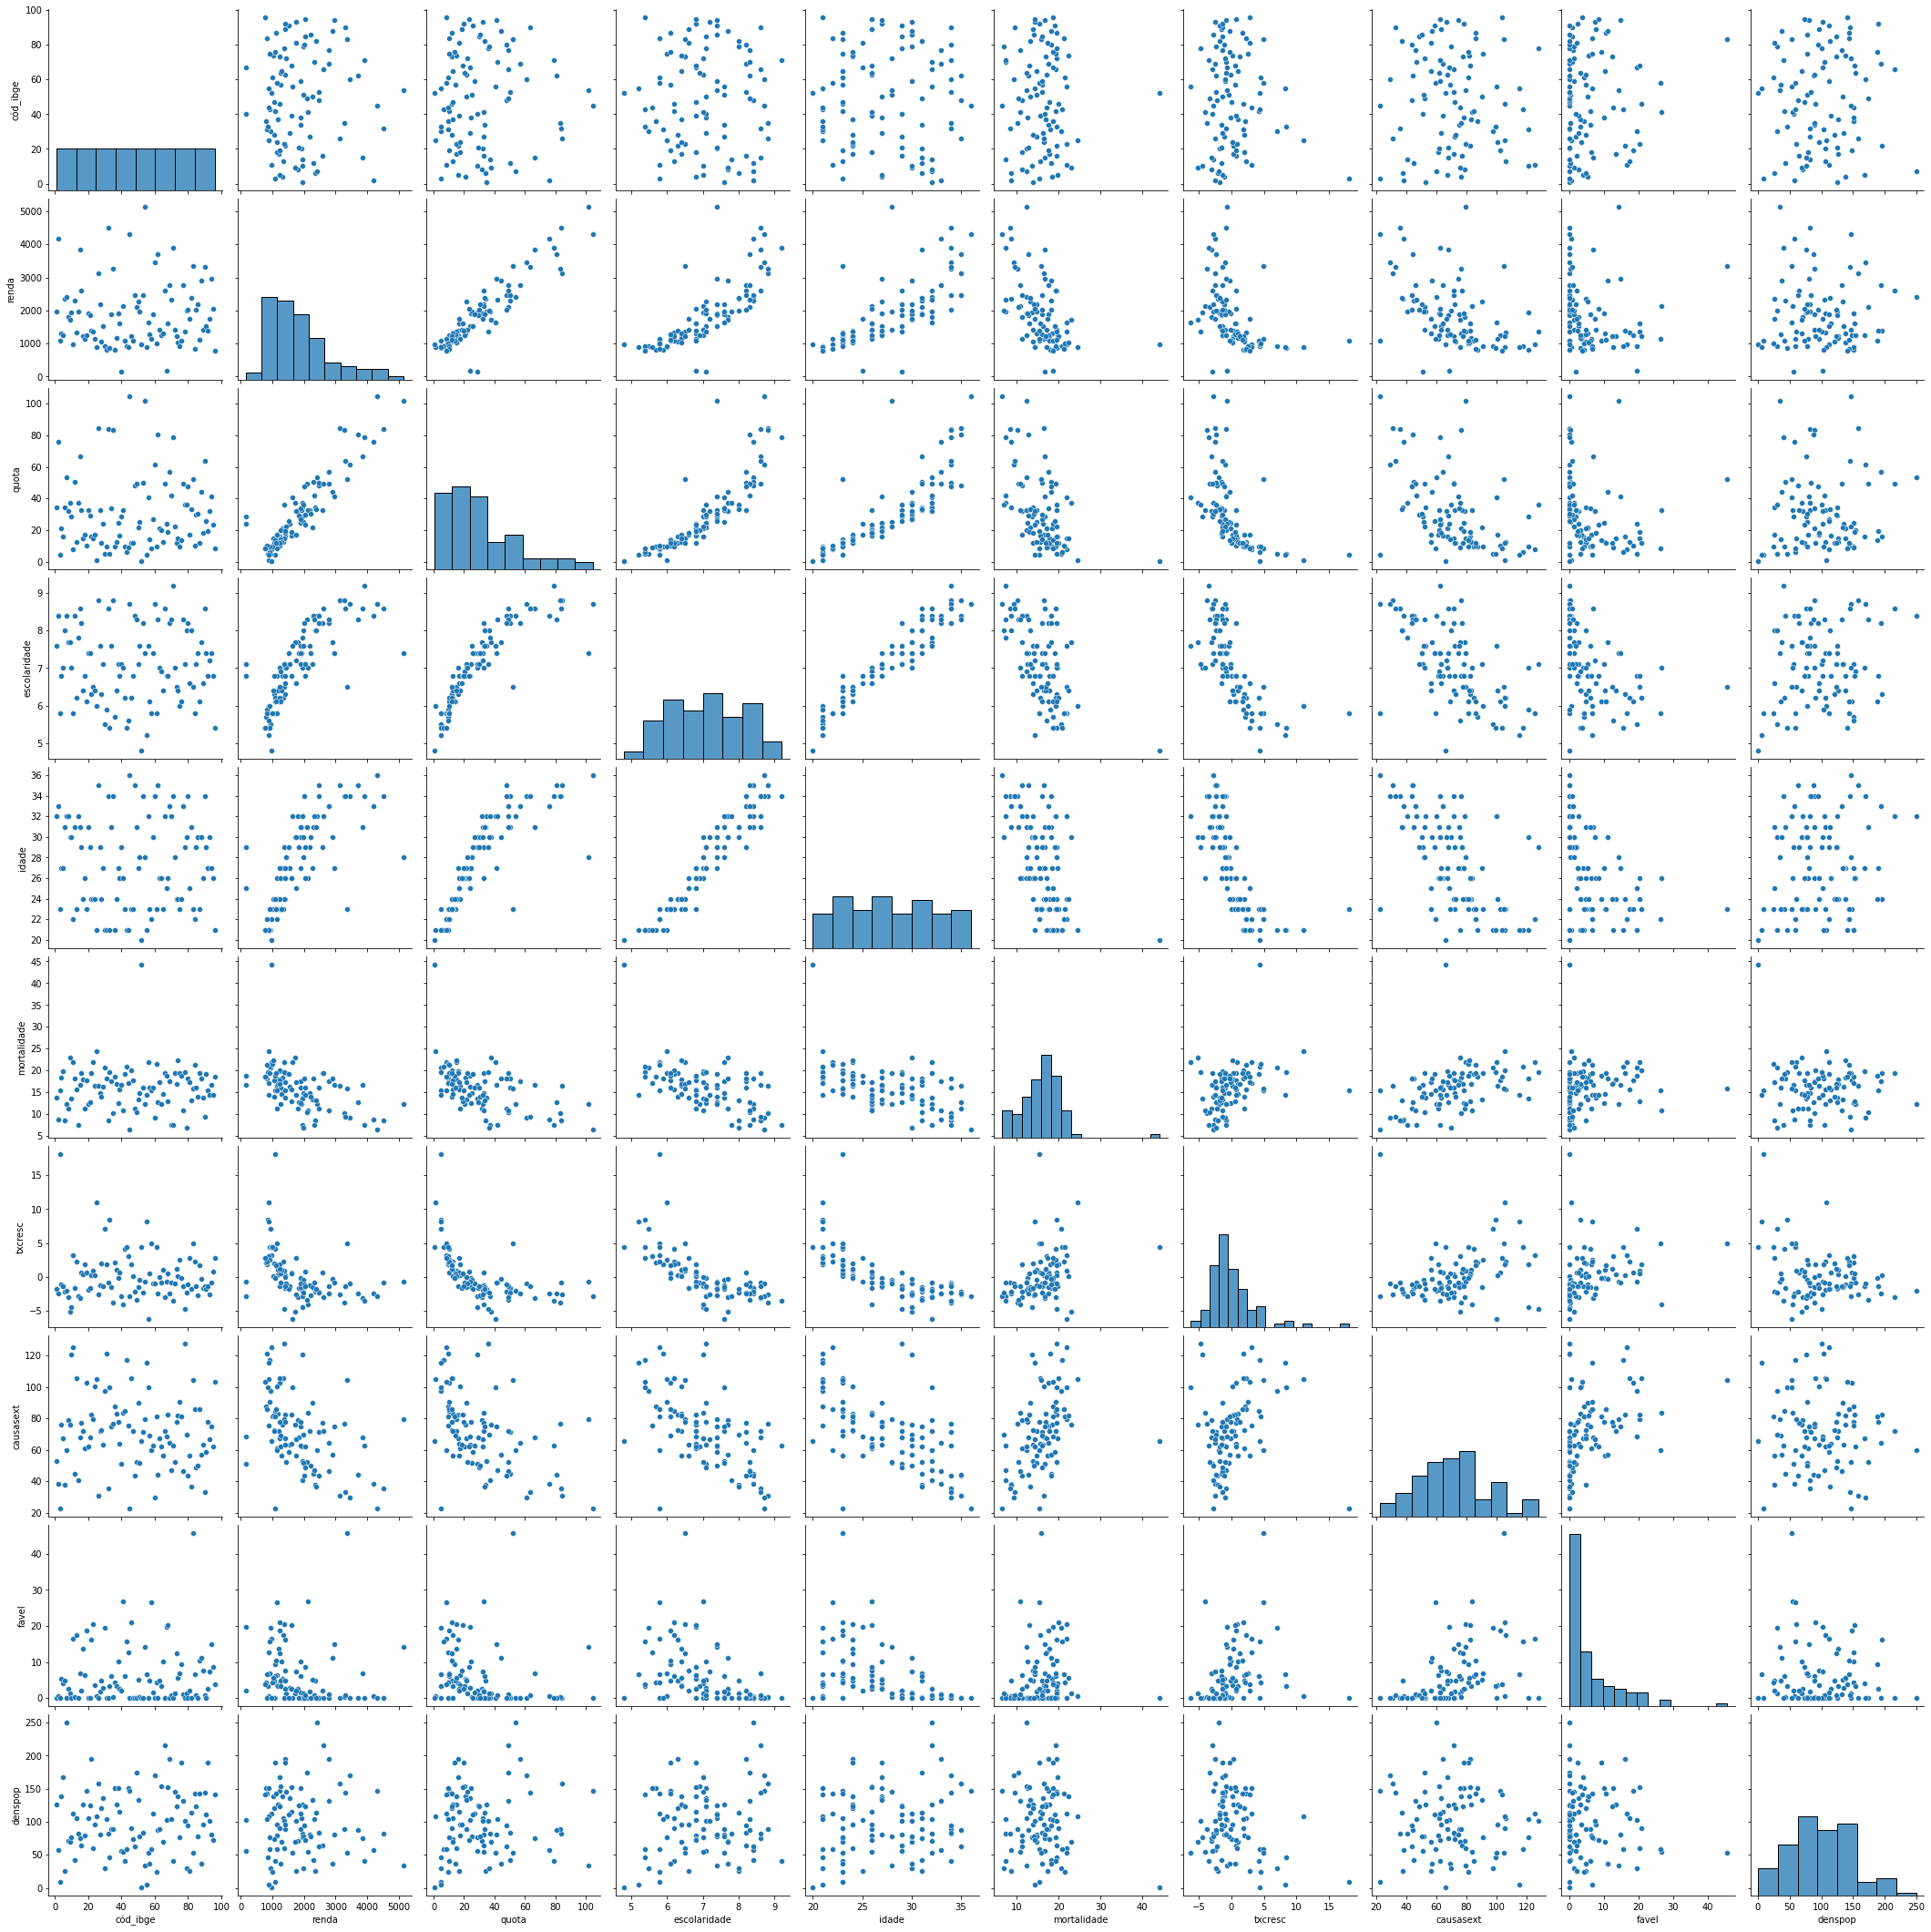

In [53]:
sns.pairplot(atlas_ambiental, height=3)

Para criarmos um gráfico de calor a respeito das correlações da nossa base de dados, o primeiro passo é estabelecer uma Matriz de Correlações. Podemos fazer isso utilizando a função corr() do pacote pandas:

In [54]:
corr = atlas_ambiental.corr() # Calcula matriz de correlação

corr.style.background_gradient(cmap='coolwarm') # Plot da matriz de correlação

,cód_ibge,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
cód_ibge,1.000000,0.029580,0.014305,-0.022510,-0.012236,0.022205,-0.074854,-0.061536,0.066252,0.058643
renda,0.029580,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.014305,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,-0.022510,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,-0.012236,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,0.022205,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.074854,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.061536,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,0.066252,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,0.058643,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


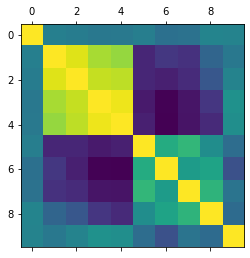

In [55]:
plt.matshow(corr)

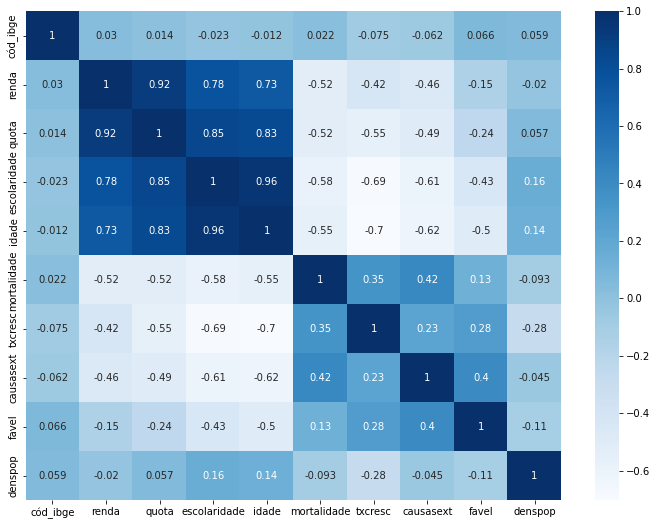

In [56]:
fig, axes = plt.subplots(1, 1, figsize=(12,9))
sns.heatmap(corr, cmap="Blues", annot=True)
fig.show()

Podemos também aplicar o plotly aqui:

In [57]:
fig = px.imshow(corr, text_auto=True, aspect='auto', color_continuous_scale='Blues')
fig.show()

## Boxplot

No Python, para construir alguns boxplots, não precisamos utilizar as bases de dados no formato long como no R:


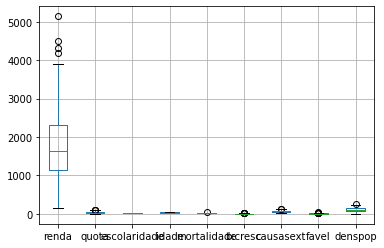

In [58]:
fig, axes = plt.subplots(1, 1)
atlas_ambiental.iloc[:,1:].boxplot(ax=axes)
plt.show()

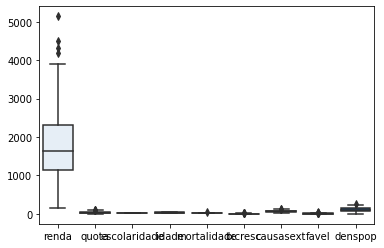

In [59]:
# Ou:
fig, axes = plt.subplots(1, 1)
sns.boxplot(data=atlas_ambiental.iloc[:,1:], palette="Blues", ax=axes)
fig.show()

A visualização ficou diferente do esperado, não é? Você consegue dizer a razão disso?

O problema está na comparação de variáveis com tipos distintos de magnitude.

Podemos resolver a situação padronizando as variáveis com o procedimento zscores, por exemplo:

$zX_{i}=\frac{X_{i}-\bar{X}}{\sigma}$

In [60]:
atlas_padronizado = atlas_ambiental.iloc[:,1:]
atlas_padronizado.copy(deep=True) # Criando cópia completa e não só uma referência ao dataset original

for col in atlas_padronizado.columns:
    if atlas_padronizado[col].dtype != 'object':
        atlas_padronizado[col] = (atlas_padronizado[col] - atlas_padronizado[col].mean())/atlas_padronizado[col].std(ddof=0)
atlas_padronizado.head(3)

,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,Água Rasa,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,Alto de Pinheiros,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,Anhanguera,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934


In [61]:
# Ou:
from sklearn.preprocessing import scale

atlas_padronizado2 = atlas_ambiental.iloc[:,2:]
atlas_padronizado2.copy(deep=True)

atlas_padronizado2 = pd.DataFrame(scale(atlas_padronizado2), index=atlas_padronizado2.index, columns=atlas_padronizado2.columns)
atlas_padronizado2.head(3)

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934


Vamos tentar, mais uma vez, utilizar a sintaxe básica do seaborn para a construção de boxplots:

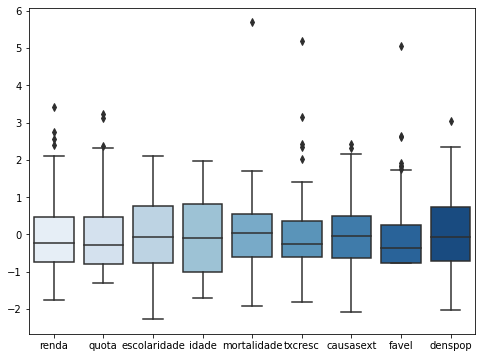

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))
sns.boxplot(data=atlas_padronizado.iloc[:,1:], palette="Blues", ax=axes)
fig.show()

Podemos deixar o gráfico mais elegante nomeando os eixos:

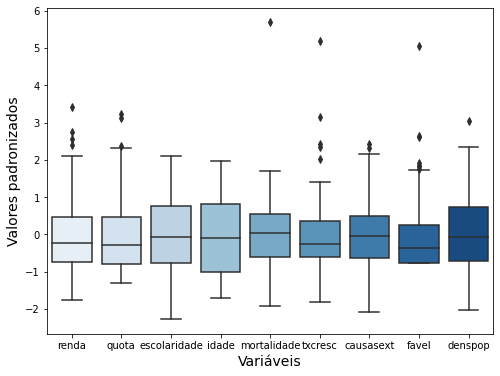

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))
sns.boxplot(data=atlas_padronizado.iloc[:,1:], palette="Blues", ax=axes)
axes.set_xlabel("Variáveis", size=14)
axes.set_ylabel("Valores padronizados", size=14)
fig.show()

Por fim, também podemos deixar os boxplots interativos utilizando o pacote plotly:

In [64]:
fig = px.box(atlas_padronizado2)
fig.update_layout(xaxis_title='Variáveis',
                  yaxis_title='Valores Padronizados')
fig.show()